In [1]:
pip install git+https://github.com/faustomorales/keras-ocr.git#egg=keras-ocr

  Cloning https://github.com/faustomorales/keras-ocr.git to c:\users\compu\appdata\local\temp\pip-install-8_jvzl61\keras-ocr_fd9c7803cf7b47a197341293ba6c4254
  Resolved https://github.com/faustomorales/keras-ocr.git to commit b9c5a5871368fc337cbb6cd8f427b64a08626421
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/faustomorales/keras-ocr.git 'C:\Users\compu\AppData\Local\Temp\pip-install-8_jvzl61\keras-ocr_fd9c7803cf7b47a197341293ba6c4254'


In [2]:
pip install "tensorflow<2.11"

  Using cached tensorflow-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
  Using cached protobuf-3.19.6-cp39-cp39-win_amd64.whl (895 kB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successf

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-e

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install protobuf==3.19.4

  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.19.4 which is incompatible.
tensorflow-intel 2.13.0 requires tensorboard<2.14,>=2.13, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.


In [5]:
pip install tensorboard==2.13.0

  Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Obtaining dependency information for protobuf>=3.19.6 from https://files.pythonhosted.org/packages/99/7b/1085be78abfb2b5f6467ccb316d6bbde59633e8f889c5ba605ebfd0a6ef8/protobuf-4.23.4-cp39-cp39-win_amd64.whl.metadata
  Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl.metadata (540 bytes)
  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/da/61/6e9ff8258422d287eec718872fb71e05324356722ab658c8afda25f51539/tensorboard_data_server-0.7.1-py3-none-any.whl.metadata
  Using cached tensorboard_data_server-0.7.1-py3-none-any.whl.metadata (1.1 kB)
Using cached protobuf-4.23.4-cp39-cp39-win_amd64.whl (422 kB)
Using cached tensorboard_data_server-0.7.1-py3-none-any.whl (2.4 kB)
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Unins

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 2.10.0 which is incompatible.
tensorflow-intel 2.13.0 requires tensorflow-estimator<2.14,>=2.13.0, but you have tensorflow-estimator 2.10.0 which is incompatible.
tensorflow 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.23.4 which is incompatible.
tensorflow 2.10.1 requires tensorboard<2.11,>=2.10, but you have tensorboard 2.13.0 which is incompatible.


In [6]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/1b/66/2f47c39cfedb29188d82555d0184a619a0bf8234fd5e5301940efb0aa464/tensorflow-2.13.0-cp39-cp39-win_amd64.whl.metadata
  Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl.metadata (2.6 kB)
  Obtaining dependency information for tensorflow-estimator<2.14,>=2.13.0 from https://files.pythonhosted.org/packages/72/5c/c318268d96791c6222ad7df1651bbd1b2409139afeb6f468c0f327177016/tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata
  Using cached tensorflow_estimator-2.13.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.13.0-cp39-cp39-win_amd64.whl (1.9 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 M

In [1]:
import typing
import string

import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import os
import hashlib

import urllib.request
import urllib.parse

tf.__version__

'2.13.0'

In [2]:
import keras_ocr

In [3]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\compu\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\compu\.keras-ocr\crnn_kurapan.h5


In [4]:
images = [
    keras_ocr.tools.read(img) for img in ['20230721_214550.jpg']
]

In [5]:
prediction_groups = pipeline.recognize(images)

1/1 [==============================] - 1s 1s/step


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

<Axes: >

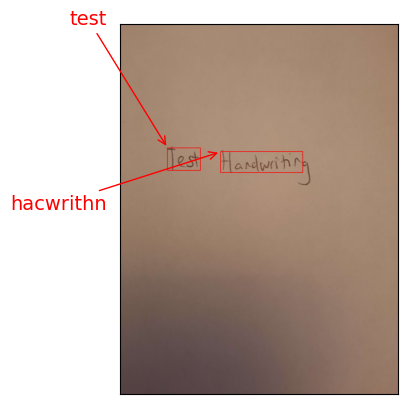

In [7]:
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0])

In [8]:
prediction_groups

[[('test',
   array([[ 511.71875, 1339.8438 ],
          [ 867.1875 , 1339.8438 ],
          [ 867.1875 , 1582.0312 ],
          [ 511.71875, 1582.0312 ]], dtype=float32)),
  ('hacwrithn',
   array([[1085.9375, 1378.9062],
          [1972.6562, 1378.9062],
          [1972.6562, 1605.4688],
          [1085.9375, 1605.4688]], dtype=float32))]]

In [9]:
from PIL import Image

In [10]:
im = Image.open(r"20230721_214550.jpg")
print(prediction_groups[0][0])
im_cropped = im.crop((prediction_groups[0][0][1][0][0], prediction_groups[0][0][1][0][1], prediction_groups[0][0][1][2][0], prediction_groups[0][0][1][2][1]))
im_cropped.show()

('test', array([[ 511.71875, 1339.8438 ],
       [ 867.1875 , 1339.8438 ],
       [ 867.1875 , 1582.0312 ],
       [ 511.71875, 1582.0312 ]], dtype=float32))


In [12]:
threshold = 127
fn = lambda x : 255 if x < threshold else 0
im_recolored = im_cropped.convert('L').point(fn, mode='1')
im_recolored.show()

In [13]:
values = np.array(im_recolored)
print(values.shape)
print(values)

(242, 355)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [14]:
normal_dataset = np.empty((39334, 28, 28))
normal_test_dataset = np.empty((19037, 28, 28))
i = 0

def convert_image(img):
    threshold = 127
    fn = lambda x : 255 if x > threshold else 0
    img_recolored = img.convert('L').point(fn, mode='1').resize((28, 28))
    return img_recolored

for file in os.listdir("data/Train/Normal"):
    img = Image.open(r"data/Train/Normal/" + file)
    converted = np.array(convert_image(img))
    if converted[0][0] == 0:
        normal_dataset[i] = converted
        i += 1
i = 0
for file in os.listdir("data/Test/Normal"):
    img = Image.open(r"data/Test/Normal/" + file)
    converted = np.array(convert_image(img))
    if converted[0][0] == 0:
        normal_test_dataset[i] = converted
        i += 1

print(i)

19037


In [15]:
dyslexic_dataset = np.empty((65534, 28, 28))
dyslexic_test_dataset = np.empty((19284, 28, 28))
i = 0

for file in os.listdir("data/Train/Corrected"):
    img = Image.open(r"data/Train/Corrected/" + file)
    converted = np.array(convert_image(img))
    if converted[0][0] == 0:
        dyslexic_dataset[i] = converted
        i += 1

i = 0
for file in os.listdir("data/Test/Corrected"):
    img = Image.open(r"data/Test/Corrected/" + file)
    converted = np.array(convert_image(img))
    if converted[0][0] == 0:
        dyslexic_test_dataset[i] = converted
        i += 1

print(i)

19284


In [16]:
normal_dataset_reorganized = np.empty((37254, 28, 28))
normal_test_dataset_reorganized = np.empty((19037, 28, 28))
dyslexic_dataset_reorganized = np.empty((65534, 28, 28))
dyslexic_test_dataset_reorganized = np.empty((19284, 28, 28))

for i in range(37254):
    normal_dataset_reorganized[i] = np.transpose(normal_dataset[i])

for i in range(65534):
    dyslexic_dataset_reorganized[i] = np.transpose(dyslexic_dataset[i])

for i in range(19037):
    normal_test_dataset_reorganized[i] = np.transpose(normal_test_dataset[i])

for i in range(19284):
    dyslexic_test_dataset_reorganized[i] = np.transpose(dyslexic_test_dataset[i])



In [17]:
k = 1
normal_dataset_list = normal_dataset_reorganized.tolist()

for i in range(len(normal_dataset_list)):
    k = 1
    for j in reversed(normal_dataset_list[i]):
        if max(j) == 0:
            #print("Image " + str(i) + " Deleted column at index " + str(28 - k) + ". K = " + str(k))
            normal_dataset_list[i].pop(28 - k)
        k += 1


In [18]:
k = 1
dyslexic_dataset_list = dyslexic_dataset_reorganized.tolist()

for i in range(len(dyslexic_dataset_list)):
    k = 1
    for j in reversed(dyslexic_dataset_list[i]):
        if max(j) == 0:
            dyslexic_dataset_list[i].pop(28 - k)
        k += 1

In [20]:
k = 1
normal_test_dataset_list = normal_test_dataset_reorganized.tolist()

for i in range(len(normal_test_dataset_list)):
    k = 1
    for j in reversed(normal_test_dataset_list[i]):
        if max(j) == 0:
            normal_test_dataset_list[i].pop(28 - k)
        k += 1

k = 1

dyslexic_test_dataset_list = dyslexic_test_dataset_reorganized.tolist()

for i in range(len(dyslexic_test_dataset_list)):
    k = 1
    for j in reversed(dyslexic_test_dataset_list[i]):
        if max(j) == 0:
            dyslexic_test_dataset_list[i].pop(28 - k)
        k += 1

In [28]:
import random
import matplotlib.cm as cm

random.seed(1)

normal_training = []

def add_spacing(img):
    for i in range(random.randint(0, 2)):
        img.append([0] * 28)

def create_training_normal(letters):
    random.seed(letters)
    nums = []
    spliced_image = []
    for i in range(letters * 20000):
        nums.append(random.randint(0, 37253))
    for i in range(20000):
        for k in range(letters):
            for j in normal_dataset_list[nums[i + 20000 * k]]:
                spliced_image.append(j)
            if k != letters - 1:
                add_spacing(spliced_image)
        normal_training.append(spliced_image)
        spliced_image = []

for i in range(3, 8):
    create_training_normal(i)

print(len(normal_training))

test = normal_training[99999]
test_image = np.transpose(np.array(test))
plt.imsave('test4.png', test_image, cmap=cm.gray)

100000


In [31]:
normal_testing = []

def create_testing_normal(letters):
    random.seed(letters)
    nums = []
    spliced_image = []
    for i in range(letters * 1000):
        nums.append(random.randint(0, 19036))
    for i in range(1000):
        for k in range(letters):
            for j in normal_test_dataset_list[nums[i + 1000 * k]]:
                spliced_image.append(j)
            if k != letters - 1:
                add_spacing(spliced_image)
        normal_testing.append(spliced_image)
        spliced_image = []

for i in range(3, 8):
    create_testing_normal(i)

print(len(normal_testing))

test = normal_testing[4999]
test_image = np.transpose(np.array(test))
plt.imsave('test7.png', test_image, cmap=cm.gray)

5000


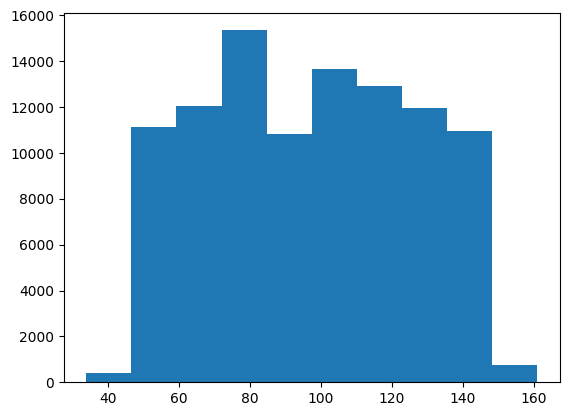

In [25]:
normal_training_columns = [len(x) for x in normal_training]
plt.hist(normal_training_columns)
plt.show()

In [26]:
import collections

freq = collections.Counter(normal_training_columns)
print(freq)

Counter({61: 1834, 60: 1728, 62: 1677, 59: 1572, 80: 1542, 58: 1541, 81: 1486, 78: 1454, 79: 1441, 63: 1380, 99: 1374, 82: 1370, 101: 1366, 57: 1365, 56: 1364, 77: 1364, 100: 1333, 83: 1323, 98: 1305, 76: 1249, 119: 1245, 118: 1233, 120: 1232, 97: 1226, 102: 1215, 121: 1212, 103: 1197, 123: 1174, 96: 1168, 116: 1160, 117: 1142, 122: 1141, 75: 1124, 55: 1120, 84: 1117, 95: 1108, 140: 1088, 104: 1077, 138: 1068, 139: 1062, 136: 1059, 137: 1052, 64: 1042, 115: 1032, 124: 1018, 141: 1014, 54: 1006, 74: 1000, 105: 994, 94: 981, 135: 977, 125: 976, 85: 970, 126: 967, 134: 956, 113: 951, 114: 940, 142: 932, 133: 925, 127: 891, 106: 890, 93: 889, 73: 879, 128: 877, 112: 856, 143: 838, 132: 829, 144: 811, 130: 807, 131: 799, 92: 782, 53: 774, 107: 770, 111: 768, 129: 761, 72: 741, 91: 740, 110: 732, 65: 718, 108: 716, 109: 713, 52: 702, 145: 674, 86: 655, 87: 611, 90: 608, 71: 571, 88: 552, 66: 551, 89: 548, 146: 532, 70: 521, 51: 518, 147: 469, 50: 449, 69: 441, 67: 439, 68: 390, 148: 358, 49:

In [32]:
normal_training_cleaned = [x for x in normal_training if (len(x) >= 50 and len(x) <= 149)]
normal_testing_cleaned = [x for x in normal_testing if (len(x) >= 50 and len(x) <= 149)]

In [33]:
len(normal_training_cleaned)
len(normal_testing_cleaned)

4915

In [38]:
dyslexic_training = []

def create_training_dyslexic(letters):
    random.seed(letters)
    nums = []
    spliced_image = []
    for i in range(letters * 20000):
        nums.append(random.randint(0, 65533))
    for i in range(20000):
        for k in range(letters):
            for j in dyslexic_dataset_list[nums[i + 20000 * k]]:
                spliced_image.append(j)
            if k != letters - 1:
                add_spacing(spliced_image)
        dyslexic_training.append(spliced_image)
        spliced_image = []

for i in range(3, 8):
    create_training_dyslexic(i)

print(len(dyslexic_training))

test = dyslexic_training[99998]
test_image = np.transpose(np.array(test))
plt.imsave('test6.png', test_image, cmap=cm.gray)

100000


In [39]:
dyslexic_testing = []

def create_training_dyslexic(letters):
    random.seed(letters)
    nums = []
    spliced_image = []
    for i in range(letters * 1000):
        nums.append(random.randint(0, 19283))
    for i in range(1000):
        for k in range(letters):
            for j in dyslexic_test_dataset_list[nums[i + 1000 * k]]:
                spliced_image.append(j)
            if k != letters - 1:
                add_spacing(spliced_image)
        dyslexic_testing.append(spliced_image)
        spliced_image = []

for i in range(3, 8):
    create_training_dyslexic(i)

print(len(dyslexic_testing))

test = dyslexic_testing[4999]
test_image = np.transpose(np.array(test))
plt.imsave('test8.png', test_image, cmap=cm.gray)

5000


In [40]:
dyslexic_training_cleaned = [x for x in dyslexic_training if (len(x) >= 50 and len(x) <= 149)]
dyslexic_testing_cleaned = [x for x in dyslexic_testing if (len(x) >= 50 and len(x) <= 149)]
len(dyslexic_testing_cleaned)

4756

In [41]:
normal_training_flattened = [np.array(x).flatten().tolist() for x in normal_training_cleaned]
normal_testing_flattened = [np.array(x).flatten().tolist() for x in normal_testing_cleaned]
print(len(normal_training_flattened))
print(len(normal_testing_flattened))

98382
4915


In [42]:
dyslexic_training_flattened = [np.array(x).flatten().tolist() for x in dyslexic_training_cleaned]
dyslexic_testing_flattened = [np.array(x).flatten().tolist() for x in dyslexic_testing_cleaned]
print(len(dyslexic_training_flattened))
print(len(dyslexic_testing_flattened))

94883
4756


In [44]:
normal_training_sorted = []
dyslexic_training_sorted = []
model_training = []
model_labels = []
for i in range(50, 150):
    normal_training_sorted.append([x for x in normal_training_flattened if len(x) / 28 == i])
    dyslexic_training_sorted.append([x for x in dyslexic_training_flattened if len(x) / 28 == i])
    model_training.append([x for x in normal_training_flattened if len(x) / 28 == i] + [x for x in dyslexic_training_flattened if len(x) / 28 == i])
    model_labels.append([0] * len([x for x in normal_training_flattened if len(x) / 28 == i]) + [1] * len([x for x in dyslexic_training_flattened if len(x) / 28 == i]))
print("done 1/2")

normal_testing_sorted = []
dyslexic_testing_sorted = []
model_testing = []
model_testing_labels = []
for i in range(50, 150):
    normal_testing_sorted.append([x for x in normal_testing_flattened if len(x) / 28 == i])
    dyslexic_testing_sorted.append([x for x in dyslexic_testing_flattened if len(x) / 28 == i])
    model_testing.append([x for x in normal_testing_flattened if len(x) / 28 == i] + [x for x in dyslexic_testing_flattened if len(x) / 28 == i])
    model_testing_labels.append([0] * len([x for x in normal_testing_flattened if len(x) / 28 == i]) + [1] * len([x for x in dyslexic_testing_flattened if len(x) / 28 == i]))

done 1/2


In [34]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install --user scikeras[tensorflow]

Note: you may need to restart the kernel to use updated packages.


In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [47]:
model_training = [np.array([np.array(x).reshape(28, 50 + y, 1) for x in model_training[y]]) for y in range(len(model_training))]
model_testing = [np.array([np.array(x).reshape(28, 50 + y, 1) for x in model_testing[y]]) for y in range(len(model_testing))]

In [48]:
cnns = []
histories = []

for i in range(100):
    print("starting model at index " + str(i))
    cnns.append(models.Sequential())
    cnns[i].add(layers.Conv2D(32, (2, 2), activation='relu', input_shape=(28, i + 50, 1)))
    cnns[i].add(layers.MaxPooling2D((2, 2)))
    cnns[i].add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnns[i].add(layers.MaxPooling2D((2, 2)))
    cnns[i].add(layers.Conv2D(64, (3, 3), activation='relu'))
    cnns[i].add(layers.Flatten())
    cnns[i].add(layers.Dense(64, activation='relu'))
    cnns[i].add(layers.Dense(10))
    cnns[i].summary()
    cnns[i].compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    histories.append(cnns[i].fit(model_training[i], np.array(model_labels[i]), epochs=20))

starting model at index 0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 49, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 11, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 9, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (

In [51]:
test_normal_dataset = []

for file in os.listdir("data/Test/Normal"):
    img = Image.open(r"data/Test/Normal/" + file)
    converted = np.array(convert_image(img))
    if converted[0][0] == 0:
        test_normal_dataset.append(converted)

print(len(test_normal_dataset))

19037


In [52]:
test_dyslexic_dataset = []

for file in os.listdir("data/Test/Corrected"):
    img = Image.open(r"data/Test/Corrected/" + file)
    converted = np.array(convert_image(img))
    if converted[0][0] == 0:
        test_dyslexic_dataset.append(converted)

print(len(test_dyslexic_dataset))

19284


In [69]:
test_img = Image.open(r"handwritten.png")
test_img2 = Image.open(r"test_image2.png")

test_losses = []
test_accs = []
for i in range(50, 150):
    cnns[i - 50].evaluate(model_testing[i - 50], np.array(model_testing_labels[i - 50]), verbose=2)

3/3 - 0s - loss: 0.2182 - accuracy: 0.9630 - 31ms/epoch - 10ms/step
4/4 - 0s - loss: 0.3549 - accuracy: 0.9434 - 34ms/epoch - 8ms/step
4/4 - 0s - loss: 0.4748 - accuracy: 0.9115 - 36ms/epoch - 9ms/step
4/4 - 0s - loss: 0.5375 - accuracy: 0.9032 - 36ms/epoch - 9ms/step
4/4 - 0s - loss: 0.4093 - accuracy: 0.9083 - 37ms/epoch - 9ms/step
4/4 - 0s - loss: 0.1579 - accuracy: 0.9426 - 38ms/epoch - 9ms/step
5/5 - 0s - loss: 0.2236 - accuracy: 0.9470 - 42ms/epoch - 8ms/step
5/5 - 0s - loss: 0.1724 - accuracy: 0.9577 - 47ms/epoch - 9ms/step
5/5 - 0s - loss: 0.1510 - accuracy: 0.9536 - 44ms/epoch - 9ms/step
4/4 - 0s - loss: 0.5333 - accuracy: 0.9016 - 37ms/epoch - 9ms/step
4/4 - 0s - loss: 0.2253 - accuracy: 0.9262 - 36ms/epoch - 9ms/step
5/5 - 0s - loss: 0.5086 - accuracy: 0.9030 - 40ms/epoch - 8ms/step
4/4 - 0s - loss: 0.5377 - accuracy: 0.9057 - 35ms/epoch - 9ms/step
4/4 - 0s - loss: 0.6032 - accuracy: 0.8942 - 36ms/epoch - 9ms/step
3/3 - 0s - loss: 0.2397 - accuracy: 0.9506 - 30ms/epoch - 10m

In [98]:
def recolor(img, width, threshold):
    fn = lambda x : 255 if x < threshold else 0
    img_recolored = img.convert('L').point(fn, mode='1').resize((width, 28))
    return img_recolored

def classify(img, threshold):
    aspect_ratio = img.size[0] / img.size[1]
    resize_width = 0
    if aspect_ratio * 28 < 50:
        resize_width = 50
    elif aspect_ratio * 28 > 149:
        resize_width = 149
    else:
        resize_width = round(aspect_ratio * 28)

    recolor(img, resize_width, threshold).show()
    converted_img = np.array(recolor(img, resize_width, threshold))
    converted_img = np.array([[[y] for y in converted_img[x]] for x in range(len(converted_img))])

    test_loss, test_acc = cnns[resize_width - 50].evaluate(np.array([converted_img]), np.array([1]), verbose=2)
    print(test_acc)
    if test_acc == 0:
        return false
    else:
        return true

In [99]:
test_img3 = Image.open(r"with.png")

classify(test_img3, 140)

1/1 - 0s - loss: 5.4849 - accuracy: 0.0000e+00 - 17ms/epoch - 17ms/step
0.0


NameError: name 'false' is not defined

In [ ]:
test_img4 = Image.open(r"stand.png")
classify(test_img4, 220)